This script uses [Mantid](https://www.mantidproject.org/) in order to process data taken on the [OFFSPEC](https://www.isis.stfc.ac.uk/Pages/offspec.aspx) instrument at the [ISIS Neutron and Muon Source](https://www.isis.stfc.ac.uk/) (UK). 

This data collection was originally performed for [*Determination of the Thin-Film Structure of Zwitterion-Doped Poly(3,4-ethylenedioxythiophene):Poly(styrenesulfonate): A Neutron Reflectivity Study*](https://pubs.acs.org/doi/10.1021/acsami.9b02700), and is provided to test techniques such as data validation within IDAaaS.

For more information on what this script is doing, see the [relevant Mantid documentation](https://docs.mantidproject.org/nightly/techniques/ISIS_Reflectometry.html).

In [1]:
# on IDAaaS, to run mantid within Jupyter, open Jupyter from the start menu and choose one of the Mantid kernels
import sys
import os
from mantid.simpleapi import * 

In [2]:
# grabs the location of the data files folder, assuming you haven't moved anything within the repository
datapath = os.path.join(os.getcwd(), "data_files/")

# loads in the raw nexus data files
LoadISISNexus(Filename=datapath+'OFFSPEC00046999.nxs', OutputWorkspace='46999')
LoadNexus(Filename=datapath+'OFFSPEC00046992.nxs', OutputWorkspace='TOF_46992')
LoadNexus(Filename=datapath+'OFFSPEC00046993.nxs', OutputWorkspace='TOF_46993')
LoadNexus(Filename=datapath+'OFFSPEC00046994.nxs', OutputWorkspace='TOF_46994')

Workspace2D
Title: 25mmol PEDOT gabriel  th=2.5
Histograms: 772
Bins: 5000
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: OFFSPEC (1900-Feb-01 to 2019-Dec-31)Instrument from: /opt/Mantid/instrument/OFFSPEC_Definition.xml

Parameters from: /opt/Mantid/instrument/OFFSPEC_Parameters.xml
Run start: 2018-May-11 07:49:40
Run end:  2018-May-11 09:20:27

In [3]:
# for details on this, see docs link above
# essentially, sets up the workspace for use of the reduction algorithm

# Child algorithms of ReflectometryReductionOneAuto
SpecularReflectionPositionCorrect(InputWorkspace='TOF_46992', TwoTheta=1, DetectorComponentName='WLSFDetector', OutputWorkspace='__TMP000001B29A437BE0')

## Child algorithms of ReflectometryReductionOne
ConvertUnits(InputWorkspace='__TMP000001B29A437BE0', OutputWorkspace='__TMP000001B29A43C050', Target='Wavelength', AlignBins=True)
CropWorkspace(InputWorkspace='__TMP000001B29A437BE0', OutputWorkspace='__TMP000001B29A43C4E0', StartWorkspaceIndex=1, EndWorkspaceIndex=1)
ConvertUnits(InputWorkspace='__TMP000001B29A43C4E0', OutputWorkspace='__TMP000001B29A43D720', Target='Wavelength', AlignBins=True)
CalculateFlatBackground(InputWorkspace='__TMP000001B29A43D720', OutputWorkspace='__TMP000001B29A435BF0', StartX=15, EndX=20)
Integration(InputWorkspace='__TMP000001B29A435BF0', OutputWorkspace='__TMP000001B21108ACD0', RangeLower=2, RangeUpper=14)
Divide(LHSWorkspace='__TMP000001B29A43C050', RHSWorkspace='__TMP000001B21108ACD0', OutputWorkspace='__TMP000001B211085F40')

### Child algorithms of CreateTransmissionWorkspace
GroupDetectors(InputWorkspace='46999', OutputWorkspace='__TMP000001B211084870', GroupingPattern='389-419')
ConvertUnits(InputWorkspace='__TMP000001B211084870', OutputWorkspace='__TMP000001B21108ACD0', Target='Wavelength', AlignBins=True)
CropWorkspace(InputWorkspace='46999', OutputWorkspace='__TMP000001B2110843E0', StartWorkspaceIndex=1, EndWorkspaceIndex=1)
ConvertUnits(InputWorkspace='__TMP000001B2110843E0', OutputWorkspace='__TMP000001B2110831A0', Target='Wavelength', AlignBins=True)
CalculateFlatBackground(InputWorkspace='__TMP000001B2110831A0', OutputWorkspace='__TMP000001B211084870', StartX=15, EndX=20)
Integration(InputWorkspace='__TMP000001B211084870', OutputWorkspace='__TMP000001B21108DF00', RangeLower=2, RangeUpper=14)
Divide(LHSWorkspace='__TMP000001B21108ACD0', RHSWorkspace='__TMP000001B21108DF00', OutputWorkspace='__TMP000001B2110831A0')
CropWorkspace(InputWorkspace='__TMP000001B2110831A0', OutputWorkspace='__TMP000001B21108ACD0', XMin=2, XMax=14)
### End of child algorithms of CreateTransmissionWorkspace

RebinToWorkspace(WorkspaceToRebin='__TMP000001B21108ACD0', WorkspaceToMatch='__TMP000001B211085F40', OutputWorkspace='__TMP000001B2110831A0')
Divide(LHSWorkspace='__TMP000001B211085F40', RHSWorkspace='__TMP000001B2110831A0', OutputWorkspace='__TMP000001B211084870')
CropWorkspace(InputWorkspace='__TMP000001B21108ACD0', OutputWorkspace='__TMP000001B2110831A0', XMin=2.2706240905191248, XMax=12.522721109543975)
ConvertUnits(InputWorkspace='__TMP000001B2110831A0', OutputWorkspace='IvsQ_46992', Target='MomentumTransfer')
## End of child algorithms of ReflectometryReductionOne

Rebin(InputWorkspace='__TMP000001B2110843E0', OutputWorkspace='IvsQ_binned_46992', Params='0.00879554,-0.03,0.0485021')
# End of child algorithms of ReflectometryReductionOneAuto

Workspace2D
Title: Direct Beam 0.5deg 30/30
Histograms: 1
Bins: 58
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: OFFSPEC (1900-Feb-01 to 2019-Dec-31)Instrument from: /opt/Mantid/instrument/OFFSPEC_Definition.xml

Parameters from: /opt/Mantid/instrument/OFFSPEC_Parameters.xml
Run start: 2018-May-11 12:38:11
Run end:  2018-May-11 13:00:54

In [4]:
# runs the reduction algorithm (see mantid docs link above) to reduce the data
ReflectometryReductionOneAuto(InputWorkspace='TOF_46992', SummationType='SumInQ', ReductionType='NonFlatSample', ProcessingInstructions='399-410', ThetaIn=0.5, FirstTransmissionRun='46999', MomentumTransferMin=0.0085, MomentumTransferStep=0.029999999999999999, MomentumTransferMax=0.055, ScaleFactor=1, OutputWorkspaceBinned='IvsQ_binned_46992', OutputWorkspace='IvsQ_46992', OutputWorkspaceWavelength='IvsLam_46992')
ReflectometryReductionOneAuto(InputWorkspace='TOF_46993', SummationType='SumInQ', ReductionType='NonFlatSample', ProcessingInstructions='390-420', ThetaIn=1.5, FirstTransmissionRun='46999', MomentumTransferMin=0.024461616931990889, MomentumTransferStep=0.029999999999999999, MomentumTransferMax=0.15799278359086491, ScaleFactor=1, OutputWorkspaceBinned='IvsQ_binned_46993', OutputWorkspace='IvsQ_46993', OutputWorkspaceWavelength='IvsLam_46993')
ReflectometryReductionOneAuto(InputWorkspace='TOF_46994', SummationType='SumInQ', ReductionType='NonFlatSample', ProcessingInstructions='390-420', ThetaIn=2.5, FirstTransmissionRun='46999', MomentumTransferMin=0.040126133459340192, MomentumTransferStep=0.029999999999999999, MomentumTransferMax=0.26776949075729722, ScaleFactor=1, OutputWorkspaceBinned='IvsQ_binned_46994', OutputWorkspace='IvsQ_46994', OutputWorkspaceWavelength='IvsLam_46994')
Stitch1DMany(InputWorkspaces='IvsQ_46992,IvsQ_46993,IvsQ_46994', OutputWorkspace='IvsQ_46992_46993_46994', Params='-0.03', OutScaleFactors='0.125265,0.0526235')

Stitch1DMany_returns(OutputWorkspace=Workspace2D
Title: 25mmol PEDOT gabriel  th=0.5
Histograms: 1
Bins: 117
Histogram
X axis: q / Angstrom^-1
Y axis: Reflectivity
Distribution: True
Instrument: OFFSPEC (1900-Feb-01 to 2019-Dec-31)Instrument from: /opt/Mantid/instrument/OFFSPEC_Definition.xml

Parameters from: /opt/Mantid/instrument/OFFSPEC_Parameters.xml
Run start: 2018-May-11 06:43:16
Run end:  2018-May-11 06:58:25
, OutScaleFactors=array([0.118746  , 0.04942797]))

In [ ]:
# install pandas for output presentation. once this pip install command has run the kernel needs to be restarted
!pip install pandas

In [5]:
# imports the original data for comparison, and converts it to a workspace
from pandas import read_csv

orig_array = read_csv(datapath+'Runs_46992_46993_46994_polymer_on_Si.csv', sep=',',header=None).to_numpy()

orig_ws = CreateWorkspace(DataX=orig_array[:,0], DataY=orig_array[:,1], DataE=orig_array[:,2], NSpec=1, UnitX="Wavelength / Angstrom")

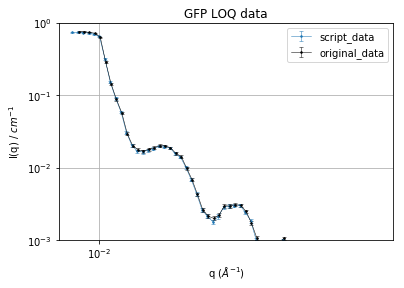

In [6]:
# plots the data for comparison
import matplotlib.pyplot as plt
%matplotlib inline
from mantid.api import AnalysisDataService as ADS

script_data = ADS.retrieve('IvsQ_46992_46993_46994')
orig_data = ADS.retrieve('orig_ws')

fig, axes = plt.subplots(edgecolor='#ffffff', num='GFP LOQ data', subplot_kw={'projection': 'mantid'})
axes.errorbar(script_data, capsize=2.0, capthick=0.5, color='#1f77b4', elinewidth=0.5, label='script_data', linewidth=0.5, marker='.', markersize=3.0)
axes.errorbar(orig_data, capsize=2.0, capthick=0.5, color='k', elinewidth=0.5, label='original_data', linewidth=0.5, marker='.', markersize=3.0)
axes.set_title('GFP LOQ data')
axes.set_xlabel('q ($\AA^{-1}$)')
axes.set_ylabel('I(q) / $cm^{-1}$')
axes.set_xlim([0.008, 0.05])
axes.set_ylim([0.001, 1.0])
axes.set_xscale('log')
axes.set_yscale('log')
axes.grid()
axes.grid(b=True, which='minor', linestyle='--')
axes.legend()